In [11]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from matplotlib import animation
from scipy.special import *
from IPython.display import HTML

NITER = 1000000
NX = 64 #number of sites along x-direction
NY = 64 #number of sites along y-direction
COUPLING_J = 1.0
COUPLING_h = 0.1
T_cr = 2.269

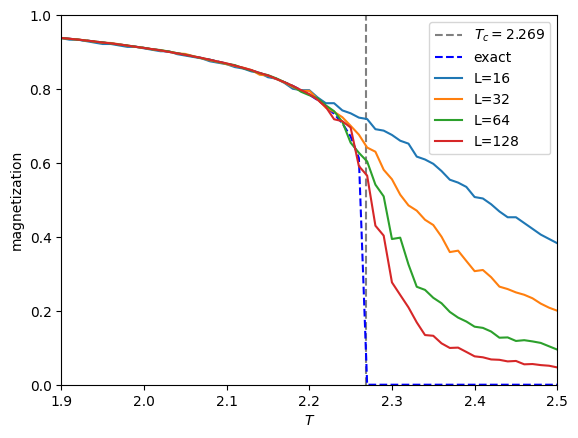

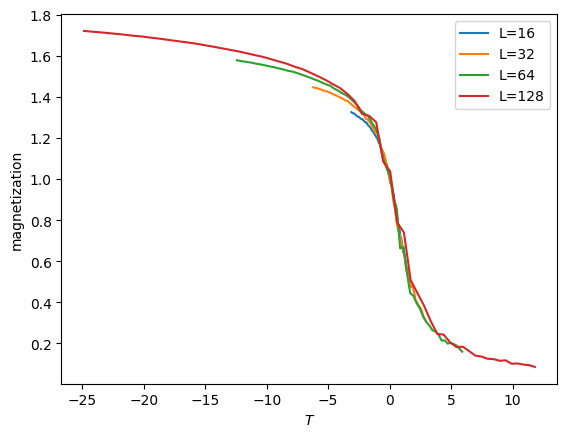

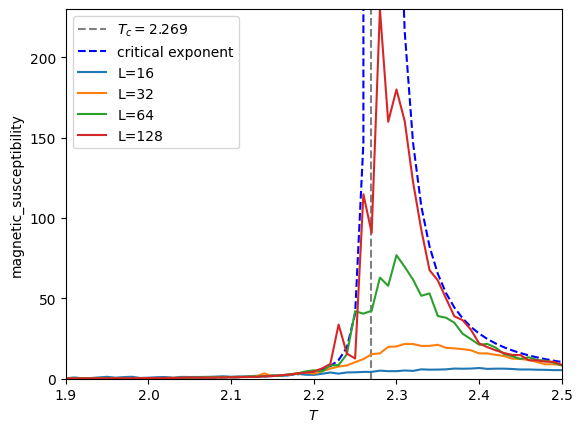

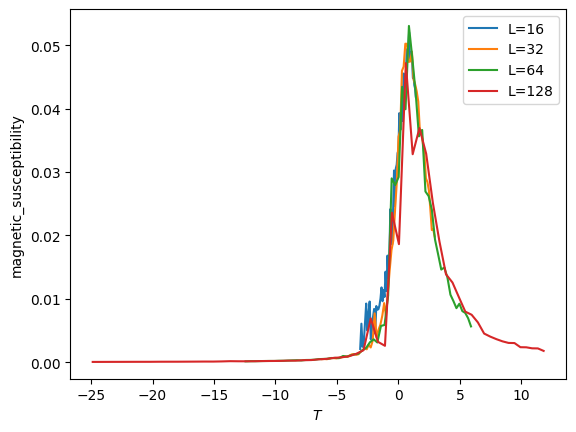

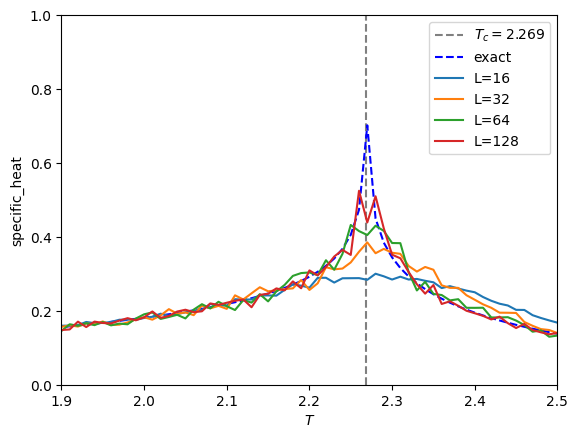

In [18]:
Tc = 2/(np.log(1 + np.sqrt(2)))
T = np.array([(i + 2)/100.0 for i in range(500)])
K = 1/T
M = (1 - 1/np.sinh(2/T)**4)
M = [m**(1/8) if m > 0 else 0 for m in M]
kai = [0.04*np.abs(t-Tc)**(-7.0/4.0) if t < Tc else 0.8*np.abs(t-Tc)**(-7.0/4.0) for t in T]
k1 = 2*np.sinh(2*K)/np.cosh(2*K)**2
k1p = 2*np.tanh(2*K)**2 - 1
k1 = np.array(k1)
k1p = np.array(k1p)
C = (2*K**2/np.pi)*(2*ellipk(k1**2)-2*ellipe(k1**2) - (1 - k1p)*(np.pi/2+k1p*ellipk(k1**2)))/np.tanh(2*K)**2
M = np.array(M)
kai = np.array(kai)
C = np.array(C)

param_L = [16, 32, 64, 128]
temperature = np.empty([len(param_L), 61])
temperature_finite_scale = np.empty([len(param_L), 61])
magnetization = np.empty([len(param_L), 61])
magnetization_finite_scale = np.empty([len(param_L), 61])
magnetic_susceptibility = np.empty([len(param_L), 61])
magnetic_susceptibility_finite_scale = np.empty([len(param_L), 61])
specific_heat = np.empty([len(param_L), 61])
for i, L in enumerate(param_L):
    if (os.path.exists(f'output/2d_Ising_L{L}_parameter_metropolis.txt')):
        count = 0
        for read in open(f'output/2d_Ising_L{L}_parameter_metropolis.txt').readlines():
            read = read[:-2].split('   ')
            temperature[i][count] = float(read[0])
            temperature_finite_scale[i][count] = (1-Tc/float(read[0]))*L
            magnetization[i][count] = float(read[1])
            magnetization_finite_scale[i][count] = float(read[1])*L**(1/8)
            magnetic_susceptibility[i][count] = float(read[2])
            magnetic_susceptibility_finite_scale[i][count] = float(read[2])/(L**(7/4))
            specific_heat[i][count] = float(read[3])
            count += 1

plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.9, 2.5)
plt.ylim(0, 1)
plt.plot(T, M, c='b', linestyle = "dashed", label='exact')
for i, L in enumerate(param_L):
    plt.plot(temperature[i], magnetization[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('magnetization')
plt.legend()
plt.show()

# plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
# plt.xlim(1.9, 2.5)
# plt.ylim(0, 1)
# plt.plot(T, M, c='b', linestyle = "dashed", label='exact')
for i, L in enumerate(param_L):
    plt.plot(temperature_finite_scale[i], magnetization_finite_scale[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('magnetization')
plt.legend()
plt.show()

plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.9, 2.5)
plt.ylim(0, 230)
plt.plot(T, kai, c='b', linestyle = "dashed", label='critical exponent')
for i, L in enumerate(param_L):
    plt.plot(temperature[i], magnetic_susceptibility[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('magnetic_susceptibility')
plt.legend()
plt.show()

# plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
# plt.xlim(1.9, 2.5)
# plt.ylim(0, 230)
for i, L in enumerate(param_L):
    plt.plot(temperature_finite_scale[i], magnetic_susceptibility_finite_scale[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('magnetic_susceptibility')
plt.legend()
plt.show()

plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.9, 2.5)
plt.ylim(0, 1)
plt.plot(T, C/T**2, c = 'b', linestyle = "dashed", label='exact')
for i, L in enumerate(param_L):
    plt.plot(temperature[i], specific_heat[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('specific_heat')
plt.legend()
plt.show()

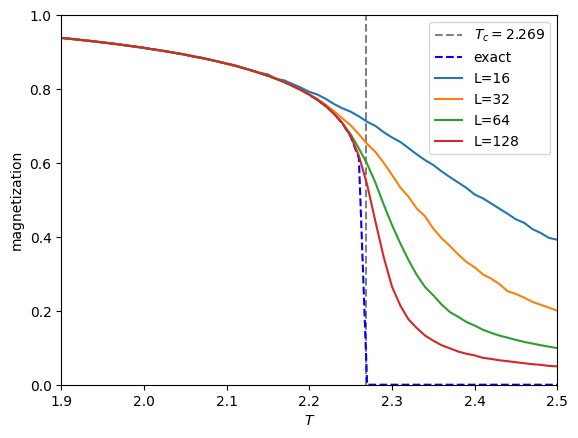

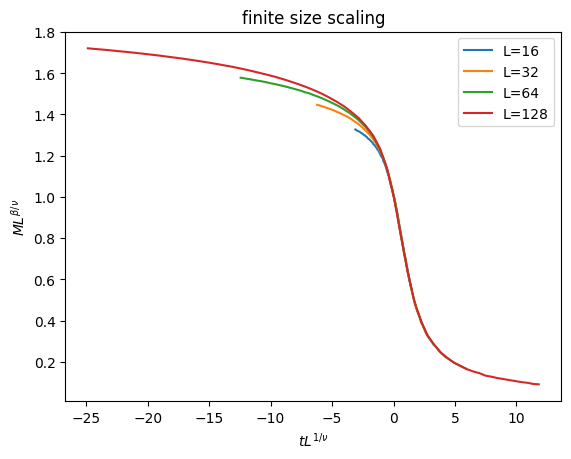

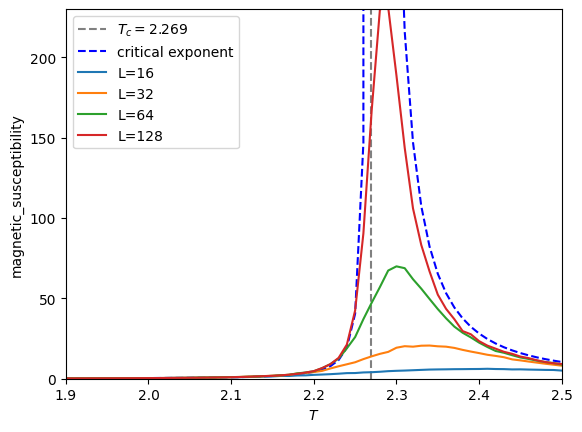

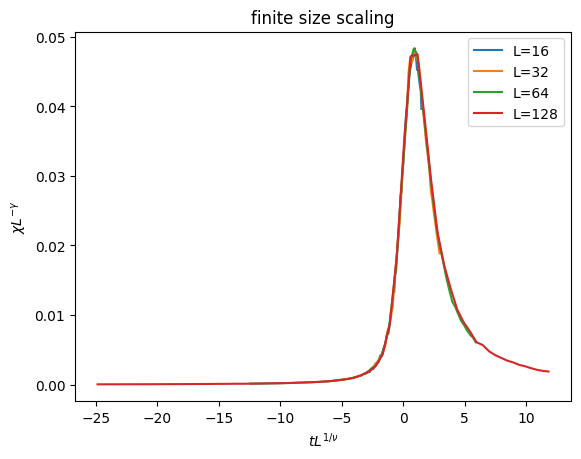

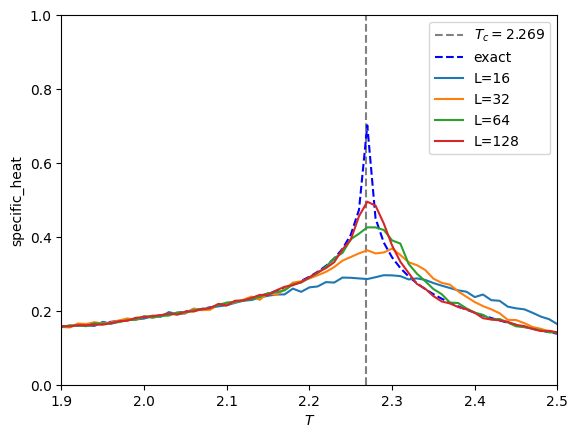

In [21]:
param_L = [16, 32, 64, 128]
temperature = np.empty([len(param_L), 61])
temperature_finite_scale = np.empty([len(param_L), 61])
magnetization = np.empty([len(param_L), 61])
magnetization_finite_scale = np.empty([len(param_L), 61])
magnetic_susceptibility = np.empty([len(param_L), 61])
magnetic_susceptibility_finite_scale = np.empty([len(param_L), 61])
specific_heat = np.empty([len(param_L), 61])
for i, L in enumerate(param_L):
    if (os.path.exists(f'output/2d_Ising_L{L}_parameter_wolff.txt')):
        count = 0
        for read in open(f'output/2d_Ising_L{L}_parameter_wolff.txt').readlines():
            read = read[:-2].split('   ')
            temperature[i][count] = float(read[0])
            temperature_finite_scale[i][count] = (1-Tc/float(read[0]))*L
            magnetization[i][count] = float(read[1])
            magnetization_finite_scale[i][count] = float(read[1])*L**(1/8)
            magnetic_susceptibility[i][count] = float(read[2])
            magnetic_susceptibility_finite_scale[i][count] = float(read[2])/(L**(7/4))
            specific_heat[i][count] = float(read[3])
            count += 1

plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.9, 2.5)
plt.ylim(0, 1)
plt.plot(T, M, c='b', linestyle = "dashed", label='exact')
for i, L in enumerate(param_L):
    plt.plot(temperature[i], magnetization[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('magnetization')
plt.legend()
plt.show()

# plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
# plt.xlim(1.9, 2.5)
# plt.ylim(0, 1)
# plt.plot(T, M, c='b', linestyle = "dashed", label='exact')
plt.title("finite size scaling")
for i, L in enumerate(param_L):
    plt.plot(temperature_finite_scale[i], magnetization_finite_scale[i], label=f'L={L}')
plt.xlabel(r'$tL^{1/\nu}$')
plt.ylabel(r'$ML^{\beta/\nu}$')
plt.legend()
plt.show()

plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.9, 2.5)
plt.ylim(0, 230)
plt.plot(T, kai, c='b', linestyle = "dashed", label='critical exponent')
for i, L in enumerate(param_L):
    plt.plot(temperature[i], magnetic_susceptibility[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('magnetic_susceptibility')
plt.legend()
plt.show()

# plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
# plt.xlim(1.9, 2.5)
# plt.ylim(0, 230)
plt.title("finite size scaling")
for i, L in enumerate(param_L):
    plt.plot(temperature_finite_scale[i], magnetic_susceptibility_finite_scale[i], label=f'L={L}')
plt.xlabel(r'$tL^{1/\nu}$')
plt.ylabel(r'$\chi L^{-\gamma}$')
plt.legend()
plt.show()

plt.axvline(x=T_cr, ymin=0, ymax=1, ls="dashed", color="gray", label=r"$T_c={}$".format(T_cr))
plt.xlim(1.9, 2.5)
plt.ylim(0, 1)
plt.plot(T, C/T**2, c = 'b', linestyle = "dashed", label='exact')
for i, L in enumerate(param_L):
    plt.plot(temperature[i], specific_heat[i], label=f'L={L}')
plt.xlabel(r'$T$')
plt.ylabel('specific_heat')
plt.legend()
plt.show()

In [31]:
img_list = []
fig = plt.figure()

for i in range(1, 1000):
    if(os.path.exists(f'output/fig_t4/2d_Ising_Metropolis_output_config_{i}.txt')):
        spin = np.empty((NX,NY))
        for read in open(f'output/fig_t4/2d_Ising_Metropolis_output_config_{i}.txt').readlines():
            read = read[:-2].split(' ')
            ix = int(read[0])
            iy = int(read[1])
            spin[ix,iy] = read[2]
        img = plt.imshow(spin, interpolation='nearest', vmin=0, vmax=1, cmap='jet', animated=True)
        time = plt.text(0.5, 1.1, f'Iteration:{i*1000}', transform=plt.gca().transAxes, ha='center', va='center', fontsize="large")
        img_list.append([img, time])
    else:
        print('no input configuration')
        sys.exit()

anim = animation.ArtistAnimation(fig, img_list, interval=10)
HTML(anim.to_jshtml())

# anim.save("2d_ising_monte_carlo_t2.gif")

no input configuration


SystemExit: 

/Users/tatsuya.miyata/repos/src/github.com/crowdworksjp/MCMC/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 640x480 with 0 Axes>

In [ ]:
temperature = [1, 2, 2.25, 3, 4, 5]
Monte_carlo_step = np.empty([len(temperature), 10000])
total_plus_spin = np.empty([len(temperature), 10000])
for i, T in enumerate(temperature):
    if (os.path.exists(f'output/Metropolis/2d_Ising_Metropolis_output_t{T}.txt')):
        count = 0
        for read in open(f'output/Metropolis/2d_Ising_Metropolis_output_t{T}.txt').readlines():
            read = read[:-2].split('   ')
            Monte_carlo_step[i][count] = int(read[0])
            total_plus_spin[i][count] = float(int(read[2])/(NX*NY))
            count += 1

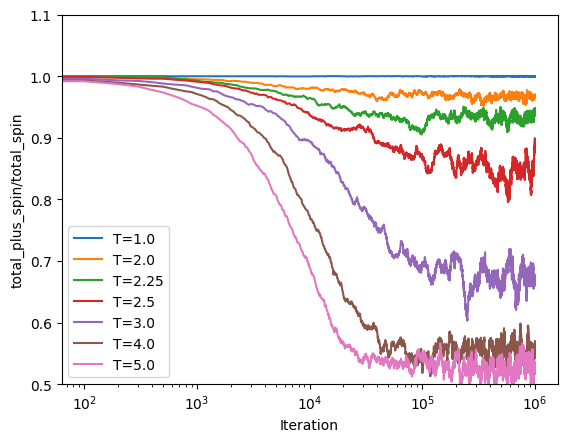

In [ ]:
plt.ylim(0.5, 1.02)
plt.xlabel('Monte_carlo_step')
plt.ylabel('total_plus_spin/total_spin')
for i, T in enumerate(temperature):
    plt.plot(Monte_carlo_step[i], total_plus_spin[i], label=f"T={T}")
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
count = 0
if (os.path.exists(f'output/2d_Ising_simulated_annealing_output.txt')):
    temperature = np.empty(10000)
    total_plus_spin_sa = np.empty(10000)
    for read in open(f'output/2d_Ising_simulated_annealing_output.txt').readlines():
        read = read[:-2].split('   ')
        temperature[count] = float(read[3])
        total_plus_spin_sa[count] = float(int(read[1])/(NX*NY))
        count += 1

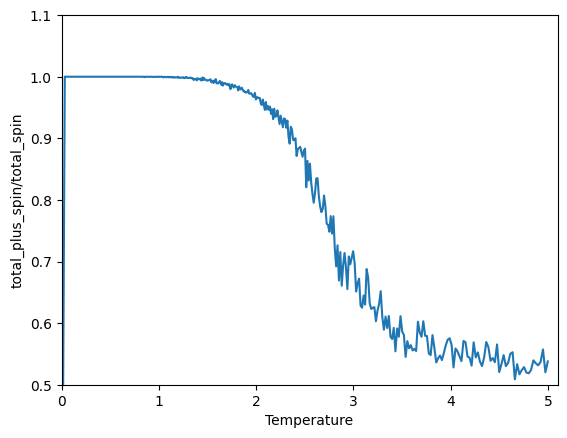

In [ ]:
plt.xlim(0.0, 5.1)
plt.ylim(0.5, 1.1)
plt.xlabel('Temperature')
plt.ylabel('total_plus_spin/total_spin')
plt.plot(temperature, total_plus_spin_sa)
plt.show()